# Python Crash Course: Molecular Dynamics

### A Simple MD Simulation
One of the primary computational methods we'll use in this course is *molecular dynamics* -- an iterative procedure in which classical systems are propagated through time according to Newton's equations. We'll discuss these methods in more detail shortly, but for now we'll adopt a _really_ simple version just to get a hands-on feel for Python coding. Specifically, we'll look at a single, hard-sphere particle moving in a squre (two-dimensional) box with hard walls. Each time the ball hits the wall, it simply bounces off, changing the direction of either its $x$ or $y$ velocity. 

First, we'll define some basic parameters for our simulation. To do this, click on the grey box below and press <Ctrl+Enter> on your keyboard or click the "play" icon above.  

In [49]:
import math
tmax=0.01       # Total simulation time in seconds
dt=0.00005     # Time-step in seconds
M=4            # Mass in AMU (1 AMU = 1.66054e-27 kg)
L=1            # Box length in meters
V=790          # Velocity (magnitude) in m/s

print("\n\nSuccessfully defined simulation parameters.")



Successfully defined simulation parameters.


This particular cell defines five parameters: tmax, dt, M, V, and L. The text separated to the right by hash signs is commentary, explaining what each parameter represents physically. Our parameters are chosen to be typical for a single He atom at room temperature. The "import" command in the first line gives us access to the "math" library. 

Next, we'll need to initialize our system -- specify the particular values of position and momentum we want the particle to start with. 

In [50]:
x=0                                   # initial x-coordinate (meters)
y=0                                   # initial y-coordinate (meters)
vx = 1                                # initial x-component of velocity (arbitrary units)
vy = 2                                # initial y-component of velocity (arbitrary units)
NormFac = math.sqrt(vx*vx + vy*vy)    # This square-root command is why we needed to import the math module
vx = V*vx/NormFac                     # Normalize so that total velocity is V
vy = V*vy/NormFac    

print("Successfully initialized particle velocity and position")

Successfully initialized particle velocity and position


And, finally, we're ready to run the simulation. We calculate the number of steps (Nsteps) of stepsize dt needed to reach tmax. We then step through each time-value iteratively, updating the position of the particle each time. 

In [51]:
Nsteps=int(round(tmax/dt))          # Total number of simulation time steps
for n in range(0,Nsteps):      # Iterate n=1,2,3,....
    x = x + dt*vx              # x-coordinate increases by dt*vx
    y = y + dt*vy              # y-coordinate increases by dt*vy
    if(x>L or x<0):            # If the particle hits a wall, switch the velocity!
        vx=-vx
    if(y>L or y<0):            # If the particle hits a wall, switch the velocity!
        vy=-vy
        
print("Final coordinates: (", x, ",", y, ")")    # Print (x,y) coordinates for final step

Final coordinates: ( 0.4946182366229537 , 0.9185767251569139 )


That's it! We've run our first MD simulation! The pair of numbers on the line just above indicates the (x,y) coordinates of the particle after the final step. 

Not very exciting, was it? Let's make things more interesting by learning how to display the simulation in real-time as it progresses -- a "molecular movie". 


### Plotting Data Using Matplotlib

Plotting in Jupyter Notebooks is accomplished using the Matplotlib library, a set of python commands that mimics (for the most part) the Matlab plotting style. Since Matplotlib isn't available by default, we have to import it. In the code snippet below, for example, we import matplotlib.pyplot as "plt". This means all matplotlib commands (such as `plot()`, `xlim`, and `xylim`) must be preceded by `plt`. 

In addition to importing the matplotlib library, we also import the *display* library. The display library gives us the tools needed to update our matplotlib figure *at each time point* in our simulation. Without this option, our plot would update only once, at the end of the simulation. 

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display

With these tools, plotting our MD simulation on the fly is easy, although the syntax takes some getting used to. Let's outline in plain text what we're about to do in the code: 

1. First, before the simulation starts, we create a plot showing a single dot for our particle at its starting coordinates of (x,y) = (0,0). This is accomplished using the command ``graph_handle, = plt.plot(x, y, 'ko')``. When you review the code, note these syntax elements:

 * The flag `'ko'` passed to the `plt.plot()` function specifies that we want our particle to be represented by a black (`'k'`) dot (`'o'`) symbol. Check the [Markers](https://matplotlib.org/3.2.1/api/markers_api.html) or [colors](https://het.as.utexas.edu/HET/Software/Matplotlib/api/colors_api.html) documentation for other options. (A more extensive color list can be found [here](https://matplotlib.org/3.3.1/gallery/color/named_colors.html).)
 
 * The object `graph_handle` returned by this function is a Matplotlib "lines" object that contains information about the data point that we just plotted. During our simulation, we'll update the x- and y-coordinate data associated with this object on the fly, producing a dynamic trajectory. The extra comma on the left-hand-side of the equality (`graph_handle, =`) tells Python that we want only the first object returned by `plt.plot()`. By default it returns a list of multiple objects, of which our `graph_handle` is just one. 
 
2. Second (still before the simulation starts) we create a text label that will display the current time step in our simulation using the `plt.text()` command. The first two arguments passed to this function are the x and y coordinates of the text box, while the third is the string that is to be displayed (our current time value). 
 * Again we store the "handle" returned by Matplotlib as a variable `text_handle` so that we can update the displayed string later. 
 * The string specifying the displayed time may look a little complex: `'t = '+'{:.1f}'.format(n*dt*1000)+' ms'`. Recall that the `+` signs simply append strings to each other. So the `'t = ' +` and `+ ms'` portions of the code just mean that our string will have the form 't = \[something inserted here\] ms'. The "something" that gets inserted is `'{:.1f}'.format(n*dt*1000)`. The first portion here (`'{:.1f}'`) is a special string-formatting syntax that says that we'll be providing a float (`f`) for display as a string and we want only one decimal point (`:.1`) to be displayed on the screen. The second portion (`format(n*dt*1000)`) tells Python what specific float it is that we want formatted: the current time in ms. (Because `dt` is our time-step in seconds, and `n` is the number of time steps taken, `n*dt*1000` is the current time in ms.)
 
3. Finally, before proceeding to the actual simulation, we update the x- and y-limits of our plot to cover the simulation box bounded by `x = 0` to the left, `x = L` to the right, `y = 0` on the bottom, and `y = L` on the top. This is accomplished using the (largely self-explanatory) commands `plt.xlim()` and `plt.ylim()`. 

4. With this setup completed, we proceed through the simulation. The actual simulation code here is the same as we've already seen, so we won't comment on it in detail. The updates that allow us to visualize the simulation on-the-fly are:
 * `graph_handle.set_xdata()` and `graph_handle.set_ydata()` update the coordinates of our data point in the graph. 
 * `text_handle.set_text()` updates the displayed current simulation time. 
 * `display.display(plt.gcf())` tells Python that we wish to update the display **now** in real-time as the simulation progresses, rather than waiting for the end of the simulation. 
 * `display.clear_output(wait=True)` tells Python to keep using the same plot box when we update the display, rather than creating a new plot at each time step. 

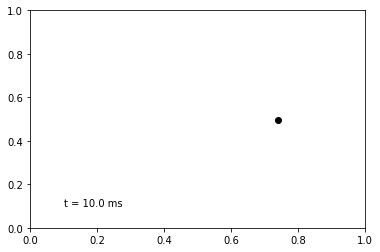

In [66]:
graph_handle, = plt.plot(x, y, 'ko')
text_handle = plt.text(0.1*L,0.1*L,'t = '+'{:.1f}'.format(n*dt*1000)+' ms')
plt.xlim([0,L])
plt.ylim([0,L])

Nsteps=int(round(tmax/dt))     
for n in range(0,Nsteps):      
    x = x + dt*vx              
    y = y + dt*vy              
    if(x>L or x<0):            
        vx=-vx
    if(y>L or y<0):            
        vy=-vy
    
    graph_handle.set_xdata(x)
    graph_handle.set_ydata(y)
    text_handle.set_text('t = '+'{:.1f}'.format(n*dt*1000)+' ms')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    

# Exercise 1

For homework this week, create a **new** Jupyter Notebook and rewrite the code above so that:

1. The MD simulation can be run with an arbitrary (within reason) number of non-interacting particles with random initial coordinates and velocities. Specify the number of particles with a variable `Npart` at the start of your code. 

2. The x- and y-coordinate trajectories of the **first** particle are stored as NumPy arrays and plotted using a single `plt.plot()` command at the **end** of the simulation. Note:
* The x and y coordinates should appear as separate lines in the same plot, with time on the horizontal axis. 
* Use different line colors for x and y, and use the `plt.legend()` command to label them. 
* Be sure to label both vertical and horizontal axes with the correct units! (Use the `plt.xlabel()` and `plt.ylabel()` commands.)